<a href="https://colab.research.google.com/github/FafiCohen/Python_Course/blob/main/Ex2_sol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



#### תרגיל 2
אליסף כהן
311524680



In [ ]:
import pandas as pd
import numpy as np



#### **סעיף 1**

In [ ]:

#load data
df=pd.read_csv('/content/can_table.csv')
df.head()

,Unnamed: 0,timestamp,LatAcc,LongAcc,YawRate,SteeringAng,BrkPed,WheelVelR,WheelVelL,TrnsShft,VehSpd,ThrPstn
0,0,0.00,,,,-2.4375,,,,,,
1,1,0.05,,,,,0.392157,,,,,
2,2,0.10,,,,,,4.488,4.492,,,
3,3,0.15,0.125,-0.3125,,,,,,,,
4,4,0.20,,,-0.456,,,,,,,


In [ ]:
def backward_fill(df):

    filled_df = df.copy()
    for col in filled_df.columns:
        previous_value = None
        for i in range(len(filled_df[col])-1, -1, -1):
            value = filled_df.at[i, col]
            if pd.isnull(value):
                if previous_value is not None:
                    filled_df.at[i, col] = previous_value
            else:
                previous_value = value
    return filled_df

def forward_fill(df):
    filled_df = df.copy()
    for col in filled_df.columns:
        previous_value = None
        for i, value in enumerate(filled_df[col]):
            if pd.isnull(value):
                if previous_value is not None:
                    filled_df.at[i, col] = previous_value
            else:
                previous_value = value
    return filled_df

df2=df.replace(r'^\s*$', np.nan, regex=True)
df_fill=backward_fill(df2)
df_fill=forward_fill(df_fill)
df_fill.tail(10)



,Unnamed: 0,timestamp,LatAcc,LongAcc,YawRate,SteeringAng,BrkPed,WheelVelR,WheelVelL,TrnsShft,VehSpd,ThrPstn
988,988,49.40,0.1875,-0.3125,-0.336,-2.375,0.392157,4.472,4.46,4,41.4375,0.392157
989,989,49.45,0.1875,-0.3125,-0.36,-2.375,0.392157,4.472,4.46,4,41.4375,0.392157
990,990,49.50,0.1875,-0.3125,-0.36,-2.375,0.392157,4.472,4.46,4,41.4375,0.392157
991,991,49.55,0.1875,-0.3125,-0.36,-2.375,0.392157,4.472,4.46,4,41.4375,0.392157
992,992,49.60,0.1875,-0.3125,-0.36,-2.375,0.392157,4.472,4.46,4,41.4375,0.392157
993,993,49.65,0.1875,-0.3125,-0.36,-2.375,0.392157,4.472,4.46,4,41.4375,0.392157
994,994,49.70,0.1875,-0.3125,-0.36,-2.375,0.392157,4.472,4.46,4,41.4375,0.392157
995,995,49.75,0.1875,-0.3125,-0.36,-2.375,0.392157,4.472,4.46,4,41.4375,0.392157
996,996,49.80,0.1875,-0.3125,-0.36,-2.375,0.392157,4.472,4.46,4,41.4375,0.392157
997,997,49.85,0.1875,-0.3125,-0.36,-2.375,0.392157,4.472,4.46,4,41.4375,0.392157


####  **סעיף 2**
הערה: השתמשתי באינדקס של הטבלה כייצוג של ציר
האיקס, לפי  סדר התצפיות

In [ ]:
df2=df2.astype(float)

<ipython-input-42-06e5ab50526b>:21: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  twin2.set_ylim(min(df2['TrnsShft']), max(df2['TrnsShft']))


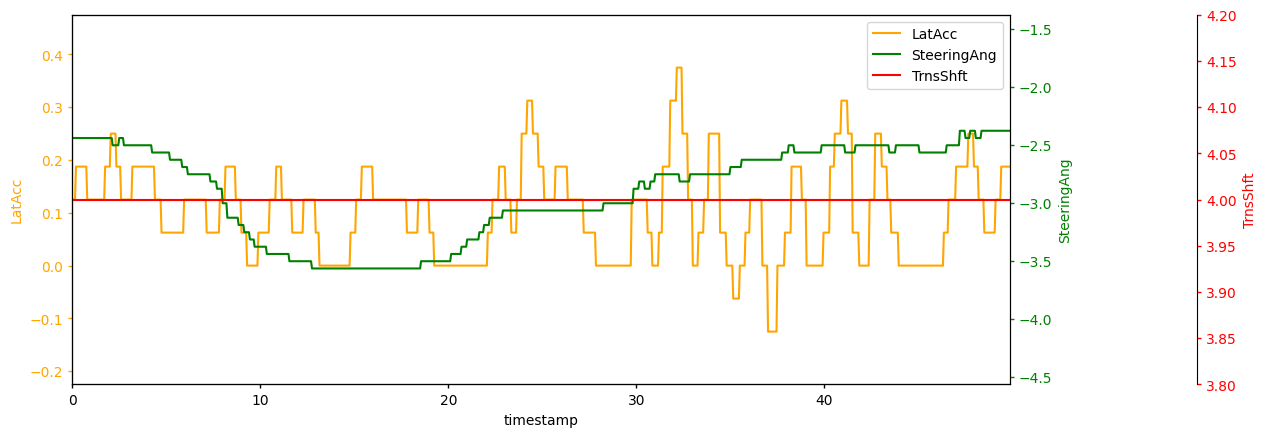

In [ ]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots()
fig.subplots_adjust(right=0.75)

twin1 = ax.twinx()
twin2 = ax.twinx()

# Offset the right spine of twin2.  The ticks and label have already been
# placed on the right by twinx above.
twin2.spines.right.set_position(("axes", 1.2))

p1, = ax.plot(df2['timestamp'],df2['LatAcc'], "orange", label="LatAcc")
p2, = twin1.plot(df2['timestamp'],df2['SteeringAng'], "g-", label="SteeringAng")
p3, = twin2.plot(df2['timestamp'],df2['TrnsShft'], "r-", label="TrnsShft")

ax.set_xlim(min(df2['timestamp']), max(df2['timestamp']))
ax.set_ylim(min(df2['LatAcc'])-0.1, max(df2['LatAcc'])+0.1)
twin1.set_ylim(min(df2['SteeringAng'])-1, max(df2['SteeringAng'])+1)
twin2.set_ylim(min(df2['TrnsShft']), max(df2['TrnsShft']))

ax.set_xlabel("timestamp")
ax.set_ylabel("LatAcc")
twin1.set_ylabel("SteeringAng")
twin2.set_ylabel("TrnsShft")

ax.yaxis.label.set_color(p1.get_color())
twin1.yaxis.label.set_color(p2.get_color())
twin2.yaxis.label.set_color(p3.get_color())

tkw = dict(size=3, width=1)
ax.tick_params(axis='y', colors=p1.get_color(), **tkw)
twin1.tick_params(axis='y', colors=p2.get_color(), **tkw)
twin2.tick_params(axis='y', colors=p3.get_color(), **tkw)
ax.tick_params(axis='x', **tkw)

ax.legend(handles=[p1, p2, p3],loc='upper right')
fig.set_figwidth(15)
plt.show()